In [ ]:
# installed mtcnn-0.1.0
!pip install mtcnn

     |████████████████████████████████| 2.3MB 3.4MB/s 


In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x  #gpu
except Exception:
  pass

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  #gpu`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Get face

In [ ]:
from mtcnn.mtcnn import MTCNN
import os
import numpy as np
from os import listdir
import cv2
detector = MTCNN()
os.mkdir('/content/drive/My Drive/Tri_tue_NTTDK/face_images')
for forder_name in listdir('/content/drive/My Drive/Tri_tue_NTTDK/Dataset'):
  os.mkdir('/content/drive/My Drive/Tri_tue_NTTDK/face_images/' + forder_name)
  for file_name in listdir('/content/drive/My Drive/Tri_tue_NTTDK/Dataset/' + forder_name):
    print(forder_name + '/' + file_name)
    image = cv2.imread('/content/drive/My Drive/Tri_tue_NTTDK/Dataset/' + forder_name + '/' + file_name)
    image = cv2.resize(image,(640,int(image.shape[0]/image.shape[1]*640)), interpolation = cv2.INTER_AREA)
    faces = detector.detect_faces(image)
    print(len(faces))
    for person in faces:
      cnt = np.random.randn(1)[0]
      bounding_box = person['box']
      im_crop = image[bounding_box[1]: bounding_box[1] + bounding_box[3], bounding_box[0]: bounding_box[0]+bounding_box[2] ]
      print('======')
      if im_crop.shape[0] > 0 and im_crop.shape[1] > 0:
        cv2.imwrite('/content/drive/My Drive/Tri_tue_NTTDK/face_images/' + forder_name + "/" + forder_name + '_' + str(cnt) +'.jpg', im_crop)

In [ ]:
import numpy as np
from os import listdir
label_to_index = {'neutral': 0, 'happy': 1, 'angry': 2, 'sad': 3, 'surprise': 4}
X_data = np.load('/content/drive/My Drive/Tri_tue_NTTDK/data_files/x_data.npy')
y_labels = np.load('/content/drive/My Drive/Tri_tue_NTTDK/data_files/y_labels_faces1_grb_28.npy')



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,y_labels, test_size = 0.05)



Using TensorFlow backend.


(2426, 160, 160, 3) (2426, 5)


print(y_train.shape)

In [ ]:
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, 5, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(8, 5, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, 3, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(),
    # tf.keras.layers.Conv2D(256, 3, activation='relu'),
    # tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),

    # TODO: fill suitable activations
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=40, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=5, activation='softmax')
])

In [ ]:

model.compile(loss='sparse_categorical_crossentropy',
            optimizer = tf.keras.optimizers.Adam(),
            metrics = ['accuracy'])
history =  model.fit(X_train, y_train, epochs=50,validation_data=(X_test,y_test), batch_size = 15)
model.summary()

# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Tri_tue_NTTDK/model_cnn/model_weight_very_big1.h5") 
model.save("/content/drive/My Drive/Tri_tue_NTTDK/model_cnn/model_very_big1.h5")
print(model.evaluate(X_test,y_test))

Epoch 1/50
162/162 [==============================] - 3s 18ms/step - loss: 1.5075 - accuracy: 0.3825 - val_loss: 1.5060 - val_accuracy: 0.3594
Epoch 2/50
162/162 [==============================] - 3s 16ms/step - loss: 1.1093 - accuracy: 0.5804 - val_loss: 1.4018 - val_accuracy: 0.3594
Epoch 3/50
162/162 [==============================] - 3s 16ms/step - loss: 0.9029 - accuracy: 0.6867 - val_loss: 0.7165 - val_accuracy: 0.7500
Epoch 4/50
162/162 [==============================] - 3s 16ms/step - loss: 0.6873 - accuracy: 0.7840 - val_loss: 0.4730 - val_accuracy: 0.9141
Epoch 5/50
162/162 [==============================] - 3s 17ms/step - loss: 0.6466 - accuracy: 0.7964 - val_loss: 1.4961 - val_accuracy: 0.7656
Epoch 6/50
162/162 [==============================] - 3s 16ms/step - loss: 0.7568 - accuracy: 0.7564 - val_loss: 0.5133 - val_accuracy: 0.8672
Epoch 7/50
162/162 [==============================] - 3s 16ms/step - loss: 0.5369 - accuracy: 0.8207 - val_loss: 0.3696 - val_accuracy: 0.9062

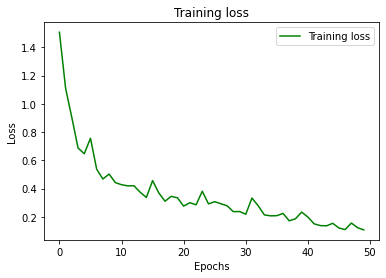

In [ ]:
import matplotlib.pyplot as plt

loss_train = history.history['loss']
# loss_val = history.history['val_loss']
epochs = range(0,50)
plt.plot(epochs, loss_train, 'g', label='Training loss')
# plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()